# WEEK6:DAY2- Logistic Regression
Logistic regression implies that the possible outcome are not numerical but rather catrgorical .
Examples are Yes/No, Will buy/Won't buy, 1/0.
Logistic regression predicts the probability of an event occurring .


In [1]:
#import the libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import statsmodels.api as sm 
import seaborn as sns 
sns.set()

In [2]:
raw_data = pd.read_csv('2.01. Admittance.csv')

In [3]:
raw_data

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
...,...,...
163,1722,Yes
164,1750,Yes
165,1555,No
166,1524,No


In [6]:
data = raw_data.copy()

In [7]:
data['Admitted'] = data['Admitted'].map({'No':0,'Yes':1})

In [8]:
data

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


In [10]:
y= data['Admitted']
x1= data['SAT']



Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


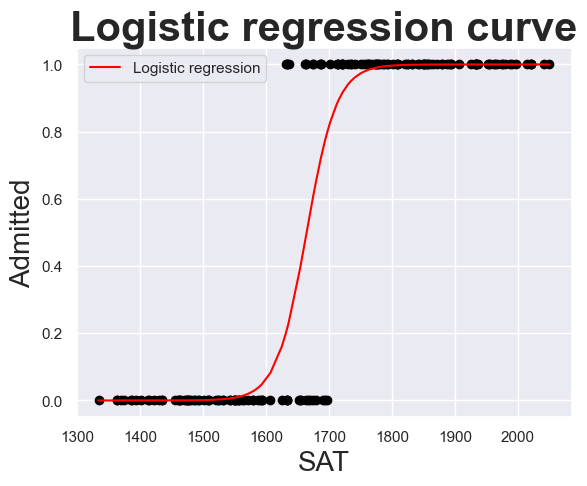

In [25]:
reg_log= sm.Logit(y,x)
results_log = reg_log.fit()
def f(x,b0,b1):
    return np.array(np.exp(b0+x*b1)/ (1+np.exp(b0+x*b1)))

f_sorted = np.sort(f(x1,results_log.params[0], results_log.params[1]))
x_sorted = np.sort(np.array(x1))

plt.scatter(x1,y, c= 'black')

plt.xlabel('SAT', fontsize = 20)
plt.ylabel('Admitted', fontsize=20)
plt.plot(x_sorted,f_sorted, c = 'red', label='Logistic regression')
plt.title('Logistic regression curve', fontdict ={'fontweight':'bold','fontsize':30})
plt.legend()
plt.show()


## plot with a regression line

In [15]:
x = sm.add_constant(x1)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Admitted   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     357.5
Date:                Wed, 31 May 2023   Prob (F-statistic):           2.98e-43
Time:                        11:45:27   Log-Likelihood:                -24.262
No. Observations:                 168   AIC:                             52.52
Df Residuals:                     166   BIC:                             58.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2519      0.203    -16.038      0.000      -3.652      -2.852
SAT            0.0022      0.000     18.907      0.000       0.002       0.002
==============================================================================
Omnibus:                        7.929   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                3.844
Skew:                           0.090   Prob(JB):                        0.146
Kurtosis:                       2.281   Cond. No.                     1.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Basics of logistic regression

In [27]:
xr= sm.add_constant(x1)
log_regr = sm.Logit(y,x).fit()
result_reg = log_regr

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


In [28]:
result_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Wed, 31 May 2023   Pseudo R-squ.:                  0.7992
Time:                        13:18:32   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""